# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1



1. For every column in the data:

a. State whether the values match the description given in the table above.

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not
match.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np

In [20]:
Food_claims = pd.read_csv('food_claims_2212.csv')
Food_claims.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


Looking at the summary statistics for Food Claims we can see that every column has 2000 observations except amount_paid, which only has 1964 observations. 
Let's investigate the amount_paid column further. We'll check the other columns for NA/null values.

*Write your answer here*

In [21]:
Food_claims['location'].isna().sum()
#There are no null values 

0

In [22]:
Food_claims['cause'].isna().sum()
#There are no null values 
Food_claims['cause'] = Food_claims['cause'].str.lower()
Food_claims['cause'] = Food_claims['cause'].str.strip()
Food_claims['cause'] = Food_claims['cause'].str.removesuffix('s')


In this column we had duplicate values in different cases (Meat and meat) plus duplicate entries for vegetables (vegetable and vegetables).
Additionally, some observations contained whitespaces. we resolve these issues by running the code above.

In [23]:
Food_claims['claim_amount'].dtypes
#The claim amount column is the wrong datatype(object), we'll change this to float (continuous). We'll remove the prefix R$ in order to convert this column into a float type.

dtype('O')

In [24]:
Food_claims['claim_amount'] = Food_claims['claim_amount'].str.removeprefix('R$')
Food_claims['claim_amount'] = Food_claims['claim_amount'].astype('float')
Food_claims['claim_amount'] = Food_claims['claim_amount'].round(2)
Food_claims['claim_amount'].head()
#The column has now been rounded to 2 decimal places and is now the correct data type. 

0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
Name: claim_amount, dtype: float64

In [25]:
Food_claims['linked_cases'].isna().sum()
#There are 26 missing values. We'll replace them with 'False'


26

In [26]:
Food_claims['linked_cases'] = Food_claims['linked_cases'].fillna(False)
Food_claims['linked_cases'].isna().sum()
#The missing values have been replaced with 'false'

0

In [27]:
Food_claims['amount_paid'].isna().sum()
#We can see that there are 36 null values in our amount_paid column, we'll replace these values with the overall median amount paid.

36

In [28]:
print(Food_claims['amount_paid'].median())
"""The median amount for amount_paid is 20105.699999999997 Brazilian reals. We'll round this value along with the rest
of the column to 2 decimal places."""

20105.699999999997


"The median amount for amount_paid is 20105.699999999997 Brazilian reals. We'll round this value along with the rest\nof the column to 2 decimal places."

In [29]:
Food_claims['amount_paid'] = Food_claims['amount_paid'].round(2)
Food_claims['amount_paid'] = Food_claims['amount_paid'].fillna(Food_claims['amount_paid'].median())
(print(Food_claims['amount_paid']))

0       51231.37
1       42111.30
2       23986.30
3       27942.72
4       16251.06
          ...   
1995    24265.02
1996     4772.77
1997    10087.81
1998    23310.24
1999     6417.92
Name: amount_paid, Length: 2000, dtype: float64


In [30]:
Food_claims['amount_paid'].isna().sum()
#All missing values have been replaced with the median and the column

0

Our columns and observations now match the specifications outlined in the criteria. We are now ready for Task 2.

## Task 2

2. Create a visualization that shows the number of claims in each location. 
Use the visualization to:

a. State which category of the variable location has the most observations

b. Explain whether the observations are balanced across categories of the
variable location


[Text(0, 0, '885'), Text(0, 0, '311'), Text(0, 0, '517'), Text(0, 0, '287')]

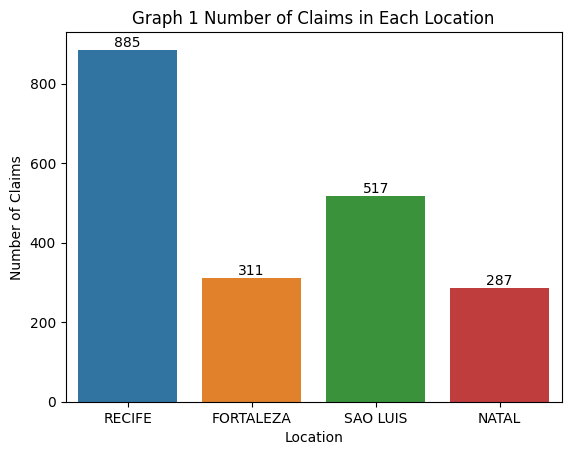

In [31]:
ax = sns.countplot(x=Food_claims["location"])
ax.set_title('Graph 1 Number of Claims in Each Location')
ax.set_xlabel("Location")
ax.set_ylabel("Number of Claims")
abs_values = Food_claims['location'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=[])

We use seaborn to create a countplot to observe the number of claims in each location in our dataset. 
Recife has the most observations (885), which is considerably more than in any of the other locations. 

We cannnot say that the observations are balanced across categories as Recife has considerably more
observations (885) than the next highest total of 517 in Sao Luis. 

The final two locations have similar totals; 311 claims in Fortaleza and 287 claims in Natal. 

_Write your answer here_

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.


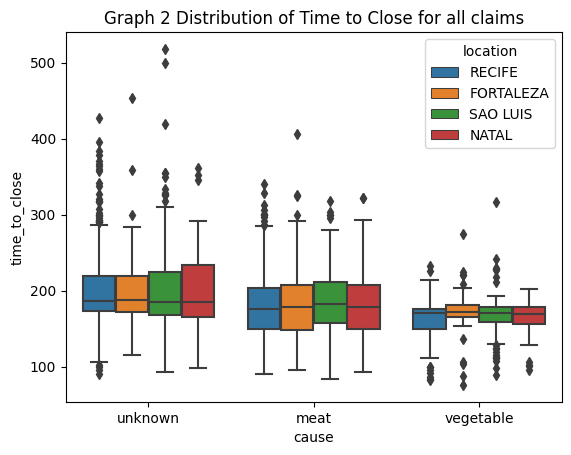

In [32]:
sns.boxplot(data=Food_claims, y='time_to_close', x='cause', hue='location').set(title='Graph 2 Distribution of Time to Close for all claims');


Our boxplot shows the distribution of time to close for all types of claims. We can clearly see in our boxplot below 
(Graph 2) that the 'unknown' cause boxplot has numerous outliers that are greater than the maximum value in the boxplot. 

These outliers are include values much greater than from any other causes,  
with many 'unknown' claims taking longer than 400 days to close. 

Meat also has several outlier values greater than the maximum value in the boxplot, 
with one observation taking longer than 400 days to close.

In our 'vegetable' cause boxplot we have several outliers that are greater than our maximum value and several more outliers
that are smaller than the minimum value of our boxplot. Several claims took less than 150 days to complete.

In summary, the distribution of time to close differs based on the type of claim.


## Task 4

Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

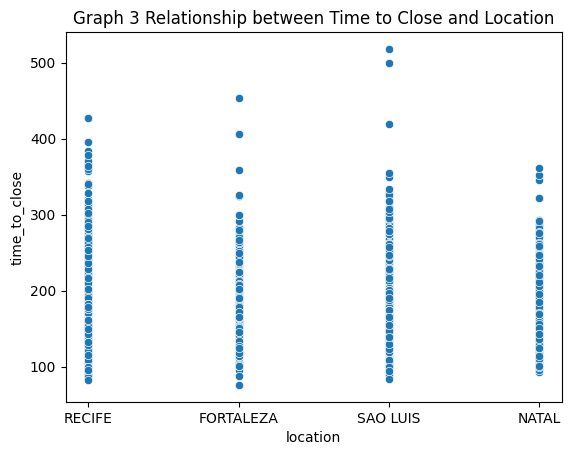

In [33]:
sns.scatterplot(data=Food_claims, y='time_to_close', x='location').set(title='Graph 3 Relationship between Time to Close and Location');

Graph 3 visualises the relationship between Time to Close and the location of the store using a scatterplot. Immediately we can see there are some
outlier values in the Sao Luis location that are much greater than in any of the other locations, with some claims taking 500 days to process.
Looking back at Graph 2 we can that these claims in Sao Luis were of an 'unknown' nature that should be investigated further.

The other three locations all have several outlier values greater than their 'maximum' values in their respective boxplots.
Again looking back at Graph 2 we can see that many of these outlier claims were of an 'unknown nature'.

Looking at the Q1-Q3 quartiles in each of our locations we don't see a great difference in the amount of time to close between locations.

To summarise, Recife has received the most claims, with claims of an 'unknown' nature taking the longest time to close compared 
to claims related to 'vegetable' which are fastest type of claim to clear. 


_Write your answer here_

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam